<h1 align="center">Final Project I</h1>

Nama  : Rizky Mardhatillah

Kelas : PYTN-KS19-022

# Pendahuluan 
## Uber and Lyft Dataset Boston, MA
From 11-26-2018 to 12-18-2018

Dataset yang akan di olah kali ini adalah Uber and Lyft Dataset Boston, MA. Dataset mengandung banyak nilai NA. Ini adalah kumpulan data yang bagus untuk menggunakan Model Regresi Linier dan melihat pola antara predektor yang berbeda seperti jam dan harga.

Bagian yang menarik dari kumpulan data ini adalah data ini menyertakan data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca. Faktor penting lainnya adalah suhu, angin, dan matahari terbenam. 

## Import Library yang dibutuhkan

In [1]:
# Impor pustaka-pustaka dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Impor fungsi-fungsi dari scikit-learn (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#import file
df = pd.read_csv('rideshare_kaggle.csv')

In [4]:
#lima item pertama dalam dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
#5 item terakhir dalam datset
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [6]:
# Melihhat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning

 Ini adalah tahap menghapus bagian data yang tidak memiliki nilai atau Null Value dan menghitung apakah ada data yang duplikat. Tahap ini penting dilakukan agar kinerja model linear regression menjadi optimal.

In [7]:
# Menjumlah kan missing values
missing_values = df.isnull().sum()

In [8]:
print(missing_values[missing_values > 0])

price    55095
dtype: int64


In [9]:
# Menghapus Null values
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(637976, 57)

In [12]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
unique_cab_types = df['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [14]:
# Mengubah tipe data menjadi timeseries dengan pandas
df['datetime'] = pd.to_datetime(df['datetime'])

## Exploratory Data Analyst

In [15]:
# Menjumlahkan data berdasrkan jam
hour_counts = df.groupby([df['datetime'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

In [16]:
df['datetime'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: datetime, dtype: datetime64[ns]

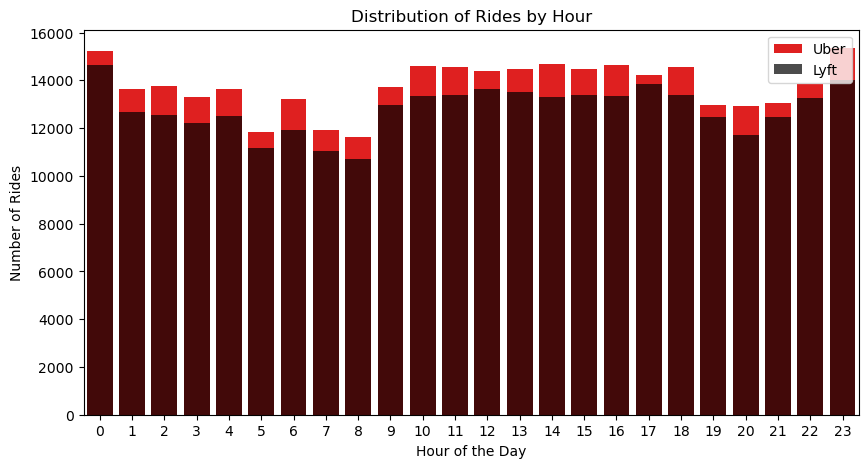

In [17]:
# Plotting Data
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts['Uber'], label='Uber', color='red')
sns.barplot(x=hour_counts.index, y=hour_counts['Lyft'], label='Lyft', color='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.legend()
plt.show()

Dari data diatas kita dapat mengetahui bahwa jumlah frekuensi "Distribution of Rides by Hour" paling tinggi adalah pukul 23 dan 00

In [18]:
# Mengelompokkan data berdasarkan hari dan cab_type
daily_counts = df.groupby([df['datetime'].dt.day, 'cab_type'])['id'].count().unstack().fillna(0)

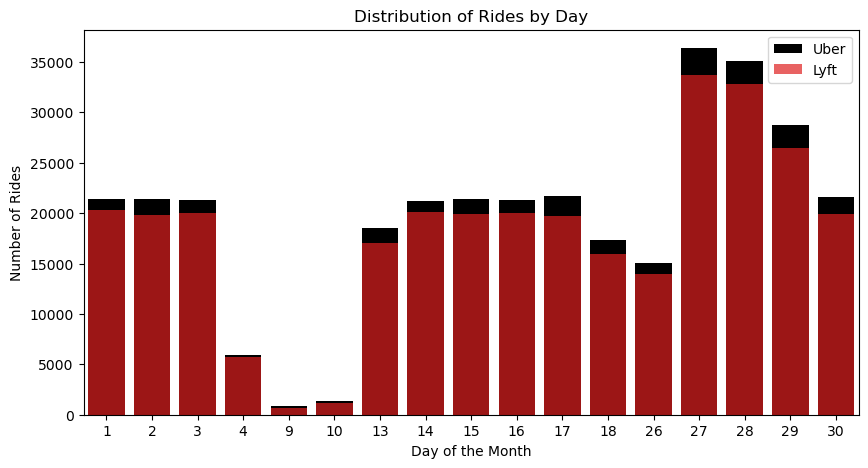

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts['Uber'], label='Uber', color='black')
sns.barplot(x=daily_counts.index, y=daily_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Day')
plt.legend()
plt.show()

In [20]:
monthly_counts = df.groupby([df['datetime'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)

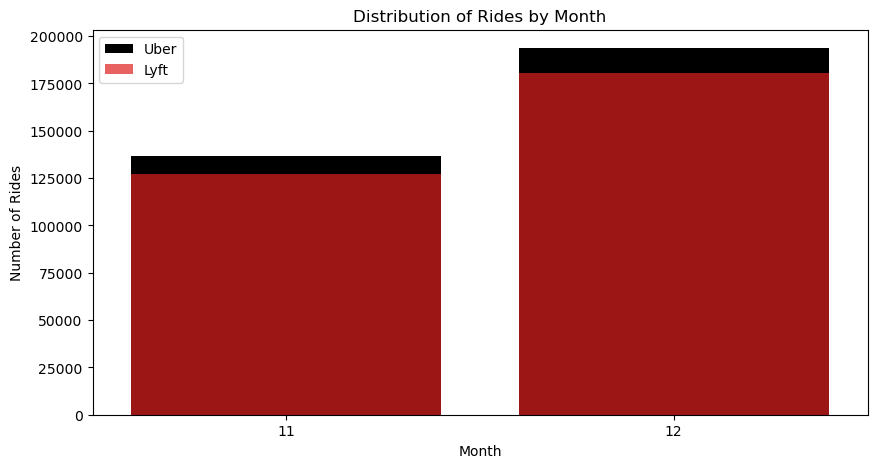

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts['Uber'], label='Uber', color='black')
sns.barplot(x=monthly_counts.index, y=monthly_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Month')
plt.legend()
plt.show()

In [22]:
source_counts = df.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

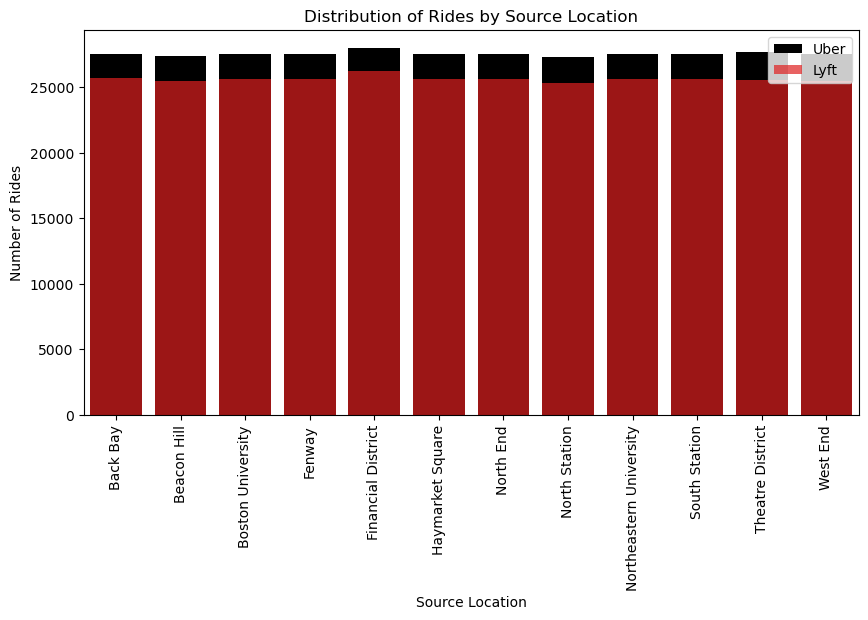

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='black')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [24]:
destination_counts = df.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

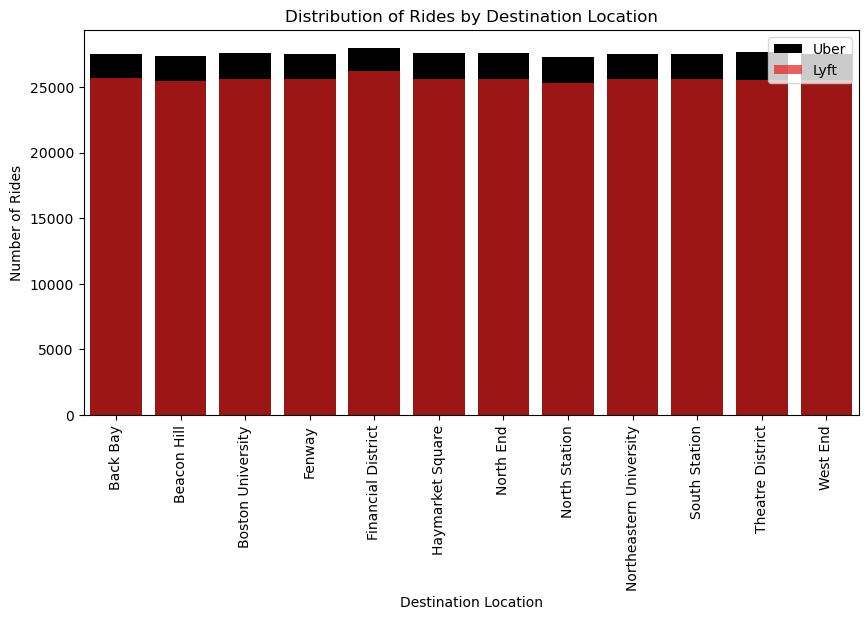

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='black')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Central Tendency


In [26]:
import statistics

In [27]:
df[['price', 'distance']]

,price,distance
0,5.0,0.44
1,11.0,0.44
2,7.0,0.44
3,26.0,0.44
4,9.0,0.44
...,...,...
693065,9.5,1.00
693066,13.0,1.00
693067,9.5,1.00
693069,27.0,1.00


## Mean

In [28]:
mean_price = statistics.mean(df['price'])
mean_distance = statistics.mean(df['distance'])

print("Mean of Price : ",mean_price)
print("Mean of Land Square Feet : ",mean_distance)

Mean of Price :  16.545125490614065
Mean of Land Square Feet :  2.189261100731062


## Median

In [29]:
median_price = statistics.median(df['price'])
median_distance = statistics.median(df['distance'])

print("Median of Price : ",median_price)
print("Median of Land Square Feet : ",median_distance)

Median of Price :  13.5
Median of Land Square Feet :  2.16


## Mode

In [30]:
mode_price = statistics.mode(df['price'])
mode_distance = statistics.mode(df['distance'])

print("Mode of Price : ",mode_price)
print("Mode of Land Square Feet : ",mode_distance)

Mode of Price :  7.0
Mode of Land Square Feet :  2.66


In [31]:
df.describe()

,timestamp,hour,day,month,datetime,price,distance,surge_multiplier,latitude,longitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,2018-12-05 21:34:04.918879488,16.545125,2.189261,1.015068,42.338161,-71.066144,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
min,1.543204e+09,0.000000,1.000000,11.000000,2018-11-26 03:40:46,2.500000,0.020000,1.000000,42.214800,-71.105400,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,2018-11-28 22:26:08,9.000000,1.270000,1.000000,42.350300,-71.081000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,2018-12-02 07:52:59,13.500000,2.160000,1.000000,42.351900,-71.063100,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,2018-12-14 22:45:04,22.500000,2.930000,1.000000,42.364700,-71.054200,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,2018-12-18 19:15:10,97.500000,7.860000,3.000000,42.366100,-71.033000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09
std,6.892028e+05,6.948776,9.982083,0.492452,NaN,9.324359,1.135413,0.095422,0.047856,0.020303,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05


# Visualization Folium map with markers
Dalam studi sebaran layanan ride-sharing di kota Boston, kami menggunakan pustaka Python folium untuk memvisualisasikan data. Peta interaktif yang dihasilkan memuat penanda (marker) yang mewakili lokasi sebaran pengemudi dan penumpang dari layanan Uber dan Lyft di berbagai daerah Boston. Informasi yang disajikan dalam peta ini membantu memahami pola sebaran layanan ride-sharing di kota ini, yang dapat berguna dalam analisis transportasi perkotaan dan pengambilan keputusan terkait mobilitas

In [32]:
latitude = 42.2148
longitude = -71.0330

In [33]:
import folium
# Membuat peta Boston dan mengurangi cakupan sekitar 10%
zoom_level = 10
zoom_level -= 1  # Perkecil cakupan sekitar 10%
boston_maps = folium.Map(location=[42.3601, -71.0589], zoom_start=zoom_level)

In [34]:
data_loc = df.copy()

In [35]:
limit = 150
data_loc = data_loc.iloc[0:limit, :]

In [36]:
data_loc.shape

(150, 57)

In [37]:
data_uber = data_loc[data_loc['cab_type'] == 'Uber']
data_lyft = data_loc[data_loc['cab_type'] == 'Lyft']

## Visualisasi Sebaran Uber & Lyft di Boston

In [38]:
import folium

# Membuat peta Boston
boston_maps = folium.Map(location=[42.3601, -71.0589], zoom_start=11)

# Menambahkan marker untuk taksi Uber
for index, row in data_uber.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    folium.Marker(location=[latitude, longitude], tooltip="Uber", icon=folium.Icon(color='blue')).add_to(boston_maps)

# Menambahkan marker untuk taksi Lyft
for index, row in data_lyft.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    folium.Marker(location=[latitude, longitude], tooltip="Lyft", icon=folium.Icon(color='green')).add_to(boston_maps)

# Menampilkan peta di Jupyter Notebook
boston_maps

Tampak ada hanya ada beberapa marker saja. Dikarenakan value dari data uber kebanyakan memakai kordinat yang sama. Oleh karena itu untuk mendapatkan jumlah pasti nya akan dilakukan cluster pada folium map.

## Cluster

In [39]:
from folium.plugins import MarkerCluster
marker_cluster_uber = MarkerCluster()
for index, row in data_uber.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    folium.Marker(location=[latitude, longitude], tooltip="Uber").add_to(marker_cluster_uber)

# Membuat cluster marker untuk taksi Lyft
marker_cluster_lyft = MarkerCluster()
for index, row in data_lyft.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    folium.Marker(location=[latitude, longitude], tooltip="Lyft").add_to(marker_cluster_lyft)

In [40]:
# Menambahkan cluster marker ke peta
marker_cluster_uber.add_to(boston_maps)
marker_cluster_lyft.add_to(boston_maps)

In [41]:
boston_maps

Dari map diatas merupakan gambaran umum distribusi Uber dan Lyft di Boston yang sudah dilakukan clustering

## Data Preparation

In [42]:
df_new = df.copy()

## Transformasi data menjadi numerik

In [43]:
# Transformasi data menjadi numerik

label_encoder = LabelEncoder()
df_new['cab_type'] = label_encoder.fit_transform(df_new['cab_type'])
df_new['timezone'] = label_encoder.fit_transform(df_new['timezone'])
df_new['source'] = label_encoder.fit_transform(df_new['source'])
df_new['destination'] = label_encoder.fit_transform(df_new['destination'])
df_new['name'] = label_encoder.fit_transform(df_new['name'])
df_new['short_summary'] = label_encoder.fit_transform(df_new['short_summary'])
df_new['long_summary'] = label_encoder.fit_transform(df_new['long_summary'])
df_new['icon'] = label_encoder.fit_transform(df_new['icon'])
df_new['product_id'] = label_encoder.fit_transform(df_new['product_id'])

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  int64         
 7   source                       637976 non-null  int64         
 8   destination                  637976 non-null  int64         
 9   cab_type                     637976 non-null  int64         
 10  product_id                   637976 non-null  int64         
 11  name                         63

In [45]:
df_new.drop(['id','timestamp','datetime',],axis=1, inplace=True)

## Mencari relasi antar kolom terhadap price

In [46]:
correlation_matrix = df_new.corr()
sorted_corr = correlation_matrix['price'].sort_values(ascending=True)

In [47]:
print(sorted_corr)

name                          -0.586644
cab_type                      -0.083385
destination                   -0.046320
source                        -0.025366
moonPhase                     -0.001602
longitude                     -0.001417
windBearing                   -0.001382
humidity                      -0.001238
day                           -0.000722
dewPoint                      -0.000615
apparentTemperatureMin        -0.000580
temperatureMax                -0.000550
temperatureHigh               -0.000516
temperatureMin                -0.000428
uvIndex                       -0.000424
apparentTemperatureMax        -0.000290
apparentTemperatureHigh       -0.000261
precipProbability             -0.000243
apparentTemperature           -0.000193
temperature                   -0.000084
precipIntensity                0.000166
temperatureLow                 0.000182
long_summary                   0.000396
ozone                          0.000460
hour                           0.000561


Untuk korelasi yang mendekati 0, tidak dipakai karena memiliki sedikit impact terhadap price

In [48]:
feature_col = ['distance','icon', 'surge_multiplier', 'product_id', 'source', 'destination', 'cab_type','name', 'price']
feature_col = df_new[feature_col]

<Axes: >

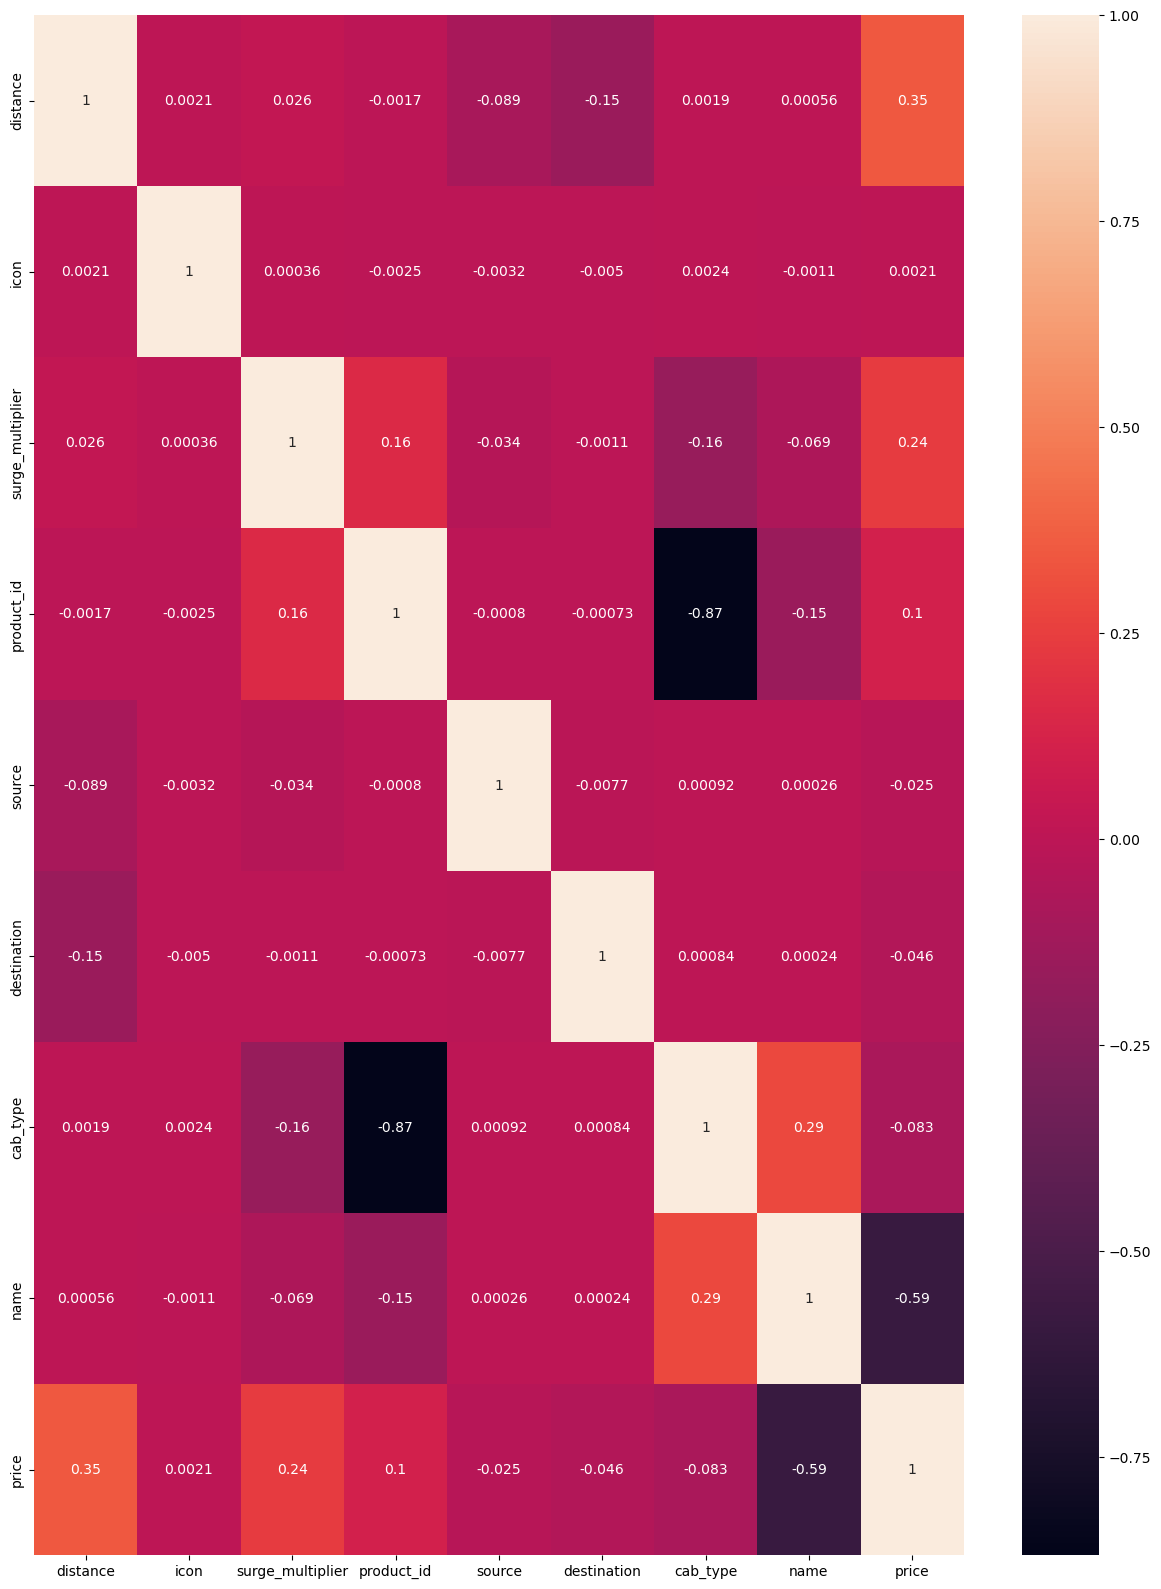

In [49]:
plt.figure(figsize=(15,20))
sns.heatmap(feature_col.corr(),annot=True)

- Korelasi Positif: Ketika korelasi antara dua variabel mendekati +1, ini menunjukkan hubungan positif. Ini berarti jika nilai salah satu variabel meningkat, kemungkinan besar nilai variabel lain juga akan meningkat. Sebaliknya, jika korelasi mendekati -1, ini menunjukkan hubungan negatif. Korelasi Dekat dengan 0: Jika korelasi mendekati 0, maka tidak ada hubungan linier yang kuat antara kedua variabel tersebut.

- Korelasi Kuat: Korelasi yang mendekati nilai absolut 1 (baik positif atau negatif) menunjukkan hubungan yang kuat antara kedua variabel tersebut.

- Korelasi Antar Variabel: Perhatikan bahwa Anda dapat membaca korelasi antara variabel dengan variabel lainnya dalam matriks korelasi.

- Perbedaan Korelasi: Perbedaan besar dalam korelasi antara berbagai pasangan variabel dapat memberikan wawasan tentang hubungan yang lebih kuat atau lebih lemah antara variabel-variabel tersebut.

Korelasi mengukur hubungan linier antara dua variabel dan tidak selalu mencerminkan hubungan sebab-akibat. Korelasi juga tidak memerhatikan variabel lain yang mungkin terlibat dalam hubungan. Oleh karena itu, hasil korelasi perlu dianalisis dalam konteks dan ditafsirkan dengan hati-hati.

## Data Preprocessing

In [50]:
data_model = df[['distance','icon', 'surge_multiplier', 'product_id', 'source', 'destination', 'cab_type','name', 'price']]
data_model

,distance,icon,surge_multiplier,product_id,source,destination,cab_type,name,price
0,0.44,partly-cloudy-night,1.0,lyft_line,Haymarket Square,North Station,Lyft,Shared,5.0
1,0.44,rain,1.0,lyft_premier,Haymarket Square,North Station,Lyft,Lux,11.0
2,0.44,clear-night,1.0,lyft,Haymarket Square,North Station,Lyft,Lyft,7.0
3,0.44,clear-night,1.0,lyft_luxsuv,Haymarket Square,North Station,Lyft,Lux Black XL,26.0
4,0.44,partly-cloudy-night,1.0,lyft_plus,Haymarket Square,North Station,Lyft,Lyft XL,9.0
...,...,...,...,...,...,...,...,...,...
693065,1.00,partly-cloudy-night,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,West End,North End,Uber,WAV,9.5
693066,1.00,partly-cloudy-night,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,West End,North End,Uber,UberXL,13.0
693067,1.00,partly-cloudy-night,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,West End,North End,Uber,UberX,9.5
693069,1.00,partly-cloudy-night,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,West End,North End,Uber,Black SUV,27.0


### Label Encoder

In [51]:
def one_hot_encoder(data, feature, keep_first=True):
    one_hot_cols = pd.get_dummies(data[feature], prefix=f'{feature}')
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col: f'{feature}_{col}'}, axis=1, inplace=True)
    
    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)
    
    if not keep_first:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [52]:
# Lakukan one-hot encoding
data_model_encoded = one_hot_encoder(data_model, 'icon', keep_first=True)
data_model_encoded = one_hot_encoder(data_model_encoded, 'product_id', keep_first=True)
data_model_encoded = one_hot_encoder(data_model_encoded, 'source', keep_first=True)
data_model_encoded = one_hot_encoder(data_model_encoded, 'destination', keep_first=True)
data_model_encoded = one_hot_encoder(data_model_encoded, 'cab_type', keep_first=True)
data_model_encoded = one_hot_encoder(data_model_encoded, 'name', keep_first=True)

In [53]:
data_model_encoded

,distance,surge_multiplier,price,icon_icon_ clear-day,icon_icon_ clear-night,icon_icon_ cloudy,icon_icon_ fog,icon_icon_ partly-cloudy-day,icon_icon_ partly-cloudy-night,icon_icon_ rain,...,name_name_Lux,name_name_Lux Black,name_name_Lux Black XL,name_name_Lyft,name_name_Lyft XL,name_name_Shared,name_name_UberPool,name_name_UberX,name_name_UberXL,name_name_WAV
0,0.44,1.0,5.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.44,1.0,11.0,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,0.44,1.0,7.0,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.44,1.0,26.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.44,1.0,9.0,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
693066,1.00,1.0,13.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
693067,1.00,1.0,9.5,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
693069,1.00,1.0,27.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Analisa Outlier

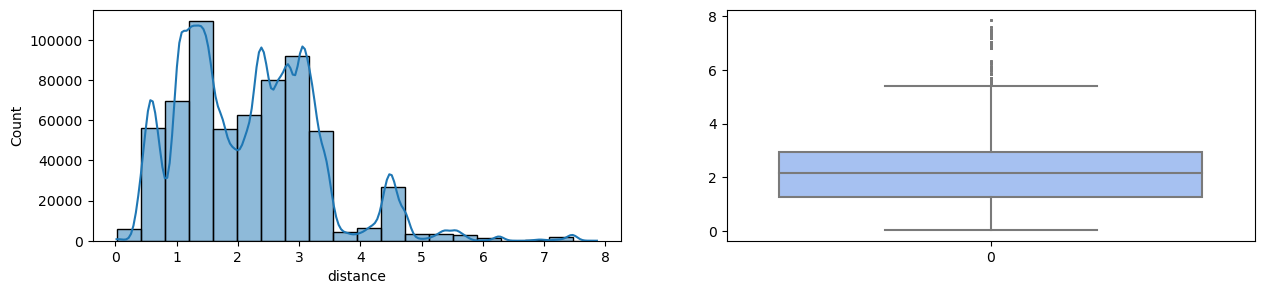

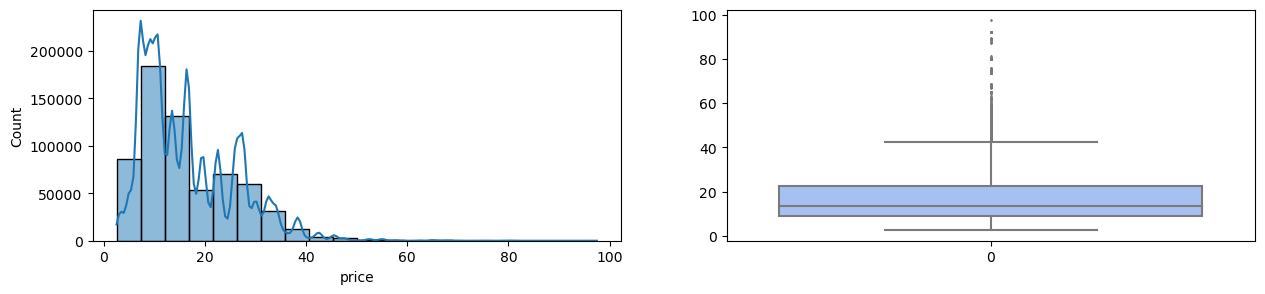

In [54]:
num_col = data_model_encoded[['distance', 'price']]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data_model_encoded[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data_model_encoded[i], ax = axs[1], color='#99befd', fliersize=1);

## Outlier Handling

Khusus data yang tidak bertipe objeck kategorikal, maka dilakukan outlier handing dengan metode

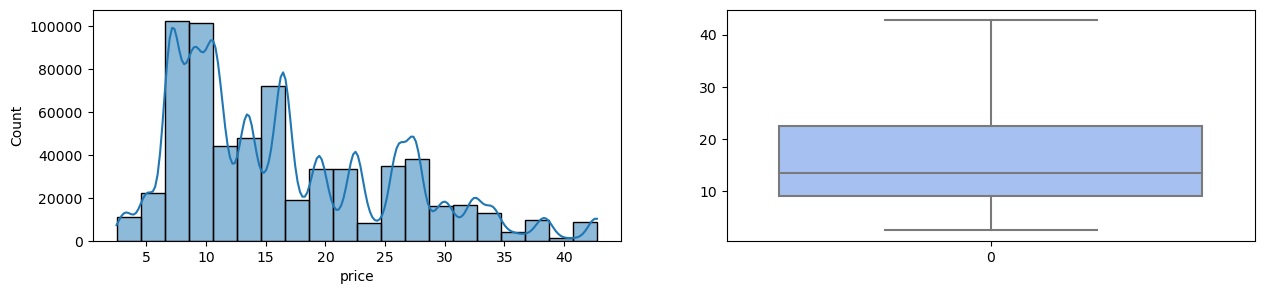

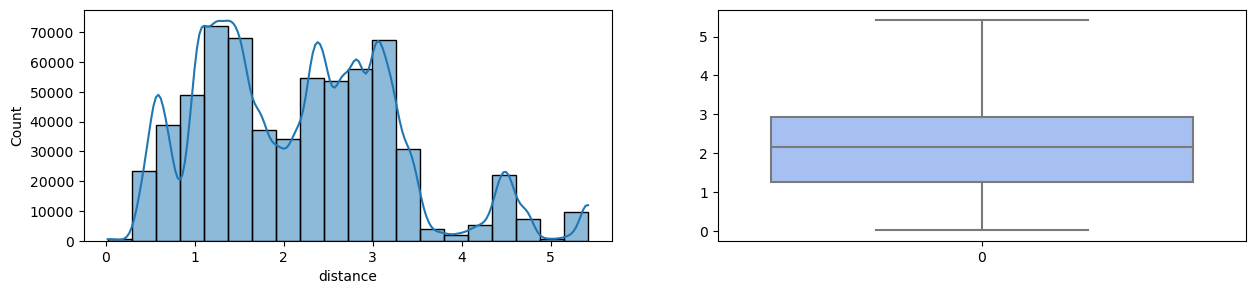

In [55]:
features_with_outliers = ['price', 'distance']
for feature in features_with_outliers:
    q1 = data_model_encoded[feature].quantile(0.25)
    q3 = data_model_encoded[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data_model_encoded.loc[data_model_encoded[feature]<lower_limit,feature] = lower_limit
    data_model_encoded.loc[data_model_encoded[feature]>upper_limit,feature] = upper_limit
    
num_col = ['price', 'distance']
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data_model_encoded[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data_model_encoded[i], ax = axs[1], color='#99befd', fliersize=1);

In [56]:
y = data_model_encoded['price']
X = data_model_encoded.drop(['price'], axis=1)

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training 30% Testing

## Pendefenisian Model

In [58]:
# creating an object of LinearRegression class
model = LinearRegression()
# fitting the training data
model.fit(X_train,y_train)

LinearRegression()

## Pelatihan Model

In [59]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

## Evaluasi Kinerja Model

In [60]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 5.1274231307651155
Root Mean Squared Error (RMSE): 2.2643814013467596
Mean Absolute Error (MAE): 1.6734183952176598
R-squared (R2): 0.9377783446787914


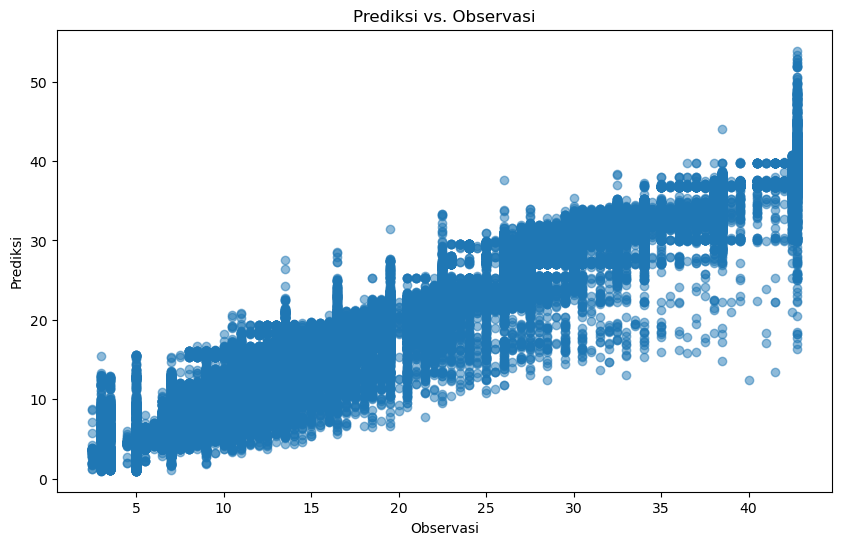

In [61]:
# Visualisasi hasil prediksi vs. observasi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prediksi vs. Observasi')
plt.xlabel('Observasi')
plt.ylabel('Prediksi')
plt.show()

In [62]:
# Menampilkan hasil prediksi
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
105826,22.5,20.283997
242165,14.5,18.581970
655567,13.5,15.334106
179096,17.5,19.471100
220615,29.0,29.848495
...,...,...
37921,16.5,16.311188
219219,9.5,7.564545
217945,16.0,12.876541
335156,23.0,21.181946


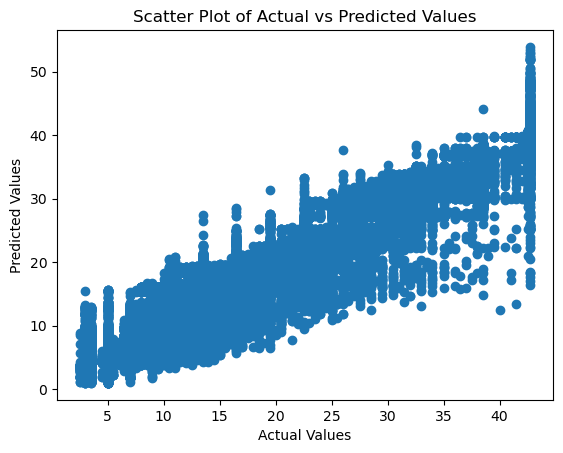

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

# Conclussion

#### Mean Squared Error (MSE):

- MSE adalah rata-rata dari kuadrat perbedaan antara nilai aktual dan nilai yang diprediksi oleh model. Semakin rendah MSE, semakin baik modelnya. Dalam kasus ini, MSE sebesar 5.13 menunjukkan bahwa rata-rata kuadrat perbedaan antara nilai aktual dan nilai prediksi adalah 5.13.

### Root Mean Squared Error (RMSE):

- RMSE adalah akar kuadrat dari MSE. Ini memberikan ide tentang seberapa besar kesalahan prediksi dalam satuan yang sama dengan variabel yang diukur. Semakin kecil RMSE, semakin baik performa model. RMSE sebesar 2.26 menunjukkan bahwa rata-rata perbedaan antara nilai aktual dan nilai prediksi adalah sekitar 2.26.

### Mean Absolute Error (MAE):

- MAE adalah rata-rata dari nilai absolut dari perbedaan antara nilai aktual dan nilai prediksi. MAE 1.67 menunjukkan bahwa rata-rata perbedaan absolut antara nilai aktual dan nilai prediksi adalah sekitar 1.67.

### R-squared (R2):

- R-squared mengukur sejauh mana variabilitas dalam variabel dependen dapat dijelaskan oleh model. R2 berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya. Nilai R2 sebesar 0.94 menunjukkan bahwa model ini dapat menjelaskan sekitar 94% dari variabilitas dalam variabel dependen.


Secara keseluruhan, hasil ini menunjukkan bahwa model ini memiliki kinerja yang sangat baik dalam memprediksi nilai target. 